# Balancing Class (Method)

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Healthcare-Diabetes.csv")
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


In [4]:
#data cleansing
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df_new2 = df.copy()
df_new2.drop(columns=["Id"],inplace=True)

In [6]:
df_new2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1


In [7]:
df_new2["Outcome"].value_counts()

Outcome
0    1816
1     952
Name: count, dtype: int64

# 1.1 Ballancing (OVERSAMPLING)

In [9]:
#maish data asli (bukan data latih)
x = df_new2.drop(columns=["Outcome"]) #fitur
y = df_new2["Outcome"] #kolom

In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#panggil SMOTE
smote = SMOTE(random_state=42)

In [11]:
#spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
from collections import Counter
smote=SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train,y_train)
print("Distribusi kelas setelah SMOTE (oversampling):", Counter(y_train_smote))

Distribusi kelas setelah SMOTE (oversampling): Counter({0: 1453, 1: 1453})


# Ratio 70:30

In [14]:
x_train_70, x_test_30, y_train_70, y_test_30 = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [15]:
smote=SMOTE(random_state=42)
x_train_smote_7030, y_train_smote_7030 = smote.fit_resample(x_train_70,y_train_70)
print("Distribusi kelas setelah SMOTE (oversampling):", Counter(y_train_smote_7030))

Distribusi kelas setelah SMOTE (oversampling): Counter({0: 1271, 1: 1271})


# Ratio 60:40 

In [17]:
x_train_60, x_test_40, y_train_60, y_test_40 = train_test_split(x, y, test_size=0.4, random_state=42, stratify=y)

In [18]:
x_train_smote_6040, y_train_smote_6040 = smote.fit_resample(x_train_60,y_train_60)
print("Distribusi kelas setelah SMOTE (oversampling):", Counter(y_train_smote_6040))

Distribusi kelas setelah SMOTE (oversampling): Counter({1: 1089, 0: 1089})


# Ratio 80:20

In [20]:
x_train_80, x_test_20, y_train_80, y_test_20 = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
x_train_smote_8020, y_train_smote_8020 = smote.fit_resample(x_train_80,y_train_80)
print("Distribusi kelas setelah SMOTE (oversampling):", Counter(y_train_smote_8020))

Distribusi kelas setelah SMOTE (oversampling): Counter({0: 1453, 1: 1453})


# 1.2 Ballancing (Undersampling)

In [166]:
from imblearn.under_sampling import RandomUnderSampler
undersampling = RandomUnderSampler(random_state=42)

In [168]:
x_train_under, y_train_under = undersampling.fit_resample(x_train, y_train)

In [25]:
print("Distribusi kelas setelah undersampling (random under sampling):", Counter(y_train_under))

Distribusi kelas setelah undersampling (random under sampling): Counter({0: 761, 1: 761})


# Ratio 70:30

In [27]:
x_train_under_7030, y_train_under_7030 = undersampling.fit_resample(x_train_70, y_train_70)

In [28]:
print("Distribusi kelas setelah undersampling Ratio 70 : 30 (random under sampling):", Counter(y_train_under_7030))

Distribusi kelas setelah undersampling Ratio 70 : 30 (random under sampling): Counter({0: 666, 1: 666})


# Ratio 60:40

In [30]:
x_train_under_6040, y_train_under_6040 = undersampling.fit_resample(x_train_60, y_train_60)

In [31]:
print("Distribusi kelas setelah undersampling Ratio 60 : 40 (random under sampling):", Counter(y_train_under_6040))

Distribusi kelas setelah undersampling Ratio 60 : 40 (random under sampling): Counter({0: 571, 1: 571})


# Ratio 80:20

In [33]:
x_train_under_8020, y_train_under_8020 = undersampling.fit_resample(x_train_80, y_train_80)

In [34]:
print("Distribusi kelas setelah undersampling Ratio 80 : 20 (random under sampling):", Counter(y_train_under_8020))

Distribusi kelas setelah undersampling Ratio 80 : 20 (random under sampling): Counter({0: 761, 1: 761})


jadi model terbaik knn ada di rasio 8020, dibuktikan dari aks akurasi pelatiahan memiliki akuras terstinggi 95% dan di pengujian 86%.
hal ini menunjukan bahwa model knn dg rasio 8020 memiliki keungglan dari rasio lainnnya, 
hal tsbt didukung dengan confusion matrix yang menyatakan bahwa (true negatif true positif, klasifiksi report)

# Over sampling

# 2. Training Tesing Ml 

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

## 2.1 Buat Training KNN

In [83]:
#membuat model KNN
model_knn = KNeighborsClassifier(n_neighbors=5)

#melatih model machine learning 
model_knn.fit(x_train_smote,y_train_smote)

#menampilkan uji performa sisi testing
y_pred_test_KNN = model_knn.predict(x_test)

#menamlkan uji performa sisi training
y_pred_train_KNN = model_knn.predict(x_train_smote)

## 2.2 Matriks evaluasi model KNN

In [87]:
#menampilkan ukurasi sisi training 
akurasi_training_knn = accuracy_score(y_train_smote,y_pred_train_KNN)

#menampilkan akurasi siis testing
akurasi_testing_knn = accuracy_score(y_test,y_pred_test_KNN)

print("Hasil akurasi trainingnya adalah:",akurasi_training_knn*100)
print("Hasil akurasi testingnya adalah:",akurasi_testing_knn*100)

Hasil akurasi trainingnya adalah: 96.1459050240881
Hasil akurasi testingnya adalah: 85.01805054151625


In [107]:
print("Classifocation report Training")
print(classification_report(y_train_smote,y_pred_train_KNN))

Classifocation report Training
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1453
           1       0.95      0.98      0.96      1453

    accuracy                           0.96      2906
   macro avg       0.96      0.96      0.96      2906
weighted avg       0.96      0.96      0.96      2906



In [109]:
print("Calassification report testing")
print(classification_report(y_test,y_pred_test_KNN))

Calassification report testing
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       363
           1       0.73      0.90      0.80       191

    accuracy                           0.85       554
   macro avg       0.83      0.86      0.84       554
weighted avg       0.87      0.85      0.85       554



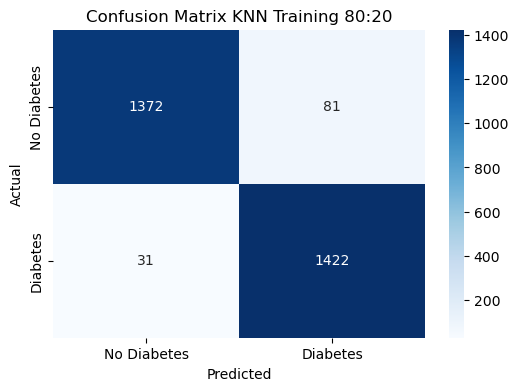

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

#confusion Matrix
# Confusion Matrix Training

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_train_smote, y_pred_train_KNN), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix KNN Training 80:20")
plt.show()

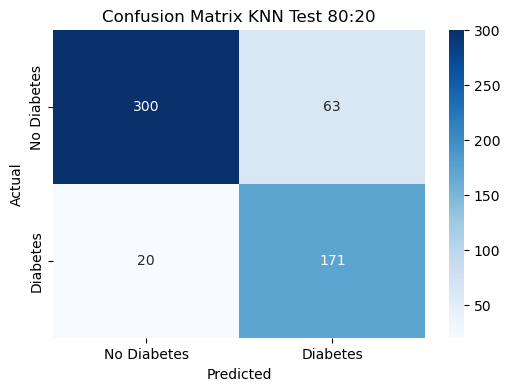

In [97]:
# Confusion Matrix Training

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_test_KNN), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix KNN Test 80:20")
plt.show()

## 2.3 Matriks Naive Bayes

In [114]:
from sklearn.naive_bayes import GaussianNB


## 2.4 model training naive bayes

In [151]:
#Buat model
model_nb = GaussianNB()
#melatih model machine learning 
model_nb.fit(x_train_smote,y_train_smote)

#menamlkan uji performa sisi training
y_pred_train_nb = model_nb.predict(x_train_smote)

#menampilkan uji performa sisi testing
y_pred_test_nb = model_nb.predict(x_test)

## 2.5 Matriks evaluasi NB

In [153]:
#menampilkan ukurasi sisi training 
akurasi_training_nb = accuracy_score(y_train_smote,y_pred_train_nb)

#menampilkan akurasi siis testing
akurasi_testing_nb = accuracy_score(y_test,y_pred_test_nb)

print("Hasil Akurasinya Trainingnya adalah : ",akurasi_training_nb*100)
print("Hasil Akurasinya Testingnya adalah : ",akurasi_testing_nb*100)

Hasil Akurasinya Trainingnya adalah :  73.81280110117
Hasil Akurasinya Testingnya adalah :  74.18772563176896


In [155]:
print("Classification report Trianing NB")
print(classification_report(y_train_smote,y_pred_train_nb))

Classification report Trianing NB
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      1453
           1       0.77      0.68      0.72      1453

    accuracy                           0.74      2906
   macro avg       0.74      0.74      0.74      2906
weighted avg       0.74      0.74      0.74      2906



In [157]:
print("Classification report Testing NB")
print(classification_report(y_test,y_pred_test_nb))

Classification report Testing NB
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       363
           1       0.61      0.70      0.65       191

    accuracy                           0.74       554
   macro avg       0.72      0.73      0.72       554
weighted avg       0.75      0.74      0.75       554



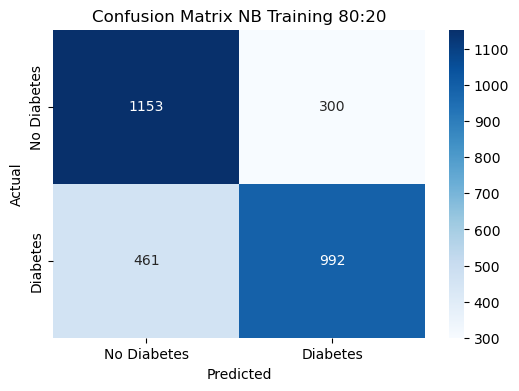

In [159]:
#confusion Matrix Training
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_train_smote, y_pred_train_nb), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix NB Training 80:20")
plt.show()

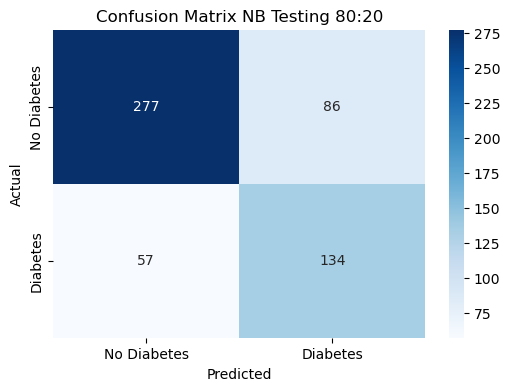

In [163]:
#confusion Matrix Testing
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_test_nb), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix NB Testing 80:20")
plt.show()

# 2.6 Matriks Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [264]:
model_rfc = RandomForestClassifier(n_estimators=100,random_state=42)

#melatih
model_rfc.fit(x_train_smote, y_train_smote)

#menghitung traning
y_pred_train_rfc = model_rfc.predict(x_train_smote)

#menghitung testing
y_pred_test_rfc = model_rfc.predict(x_test)

## 2.7 Matriks Evaluasi RFC

In [267]:
#menampilkan akurasi sisi training
akurasi_training_rfc = accuracy_score(y_train_smote,y_pred_train_rfc)

#menampilkan akurasi sisi testing
akurasi_testing_rfc = accuracy_score(y_test,y_pred_test_rfc)

print("Hasil Akurasinya Trainingnya RFC adalah : ", akurasi_training_rfc*100)
print("Hasil Akurasinya Testingnya RFC adalah : ",akurasi_testing_rfc*100)

Hasil Akurasinya Trainingnya RFC adalah :  100.0
Hasil Akurasinya Testingnya RFC adalah :  99.63898916967509


In [269]:
print("Classification report Trianing RFC")
print(classification_report(y_train_smote,y_pred_train_rfc))

Classification report Trianing RFC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1453
           1       1.00      1.00      1.00      1453

    accuracy                           1.00      2906
   macro avg       1.00      1.00      1.00      2906
weighted avg       1.00      1.00      1.00      2906



In [271]:
print("Classification report Testing RFC")
print(classification_report(y_test,y_pred_test_rfc))

Classification report Testing RFC
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       363
           1       1.00      0.99      0.99       191

    accuracy                           1.00       554
   macro avg       1.00      0.99      1.00       554
weighted avg       1.00      1.00      1.00       554



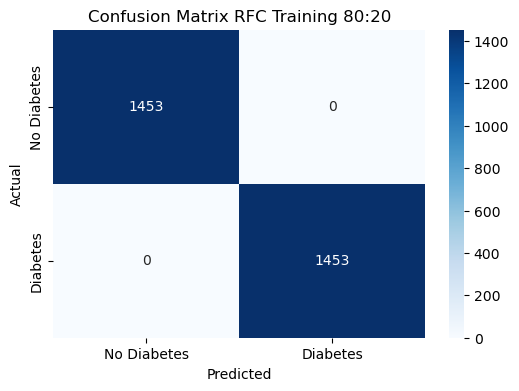

In [273]:
#confusion Matrix Training
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_train_smote, y_pred_train_rfc), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix RFC Training 80:20")
plt.show()

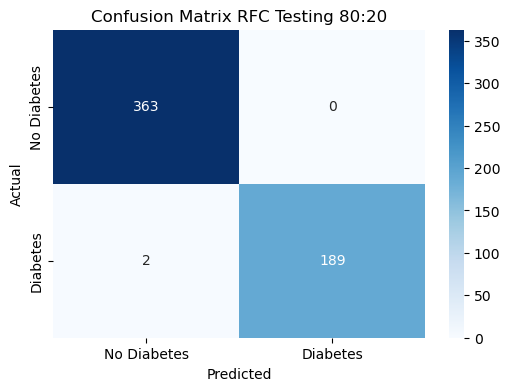

In [275]:
#confusion Matrix Testing
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_test_rfc), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix RFC Testing 80:20")
plt.show()

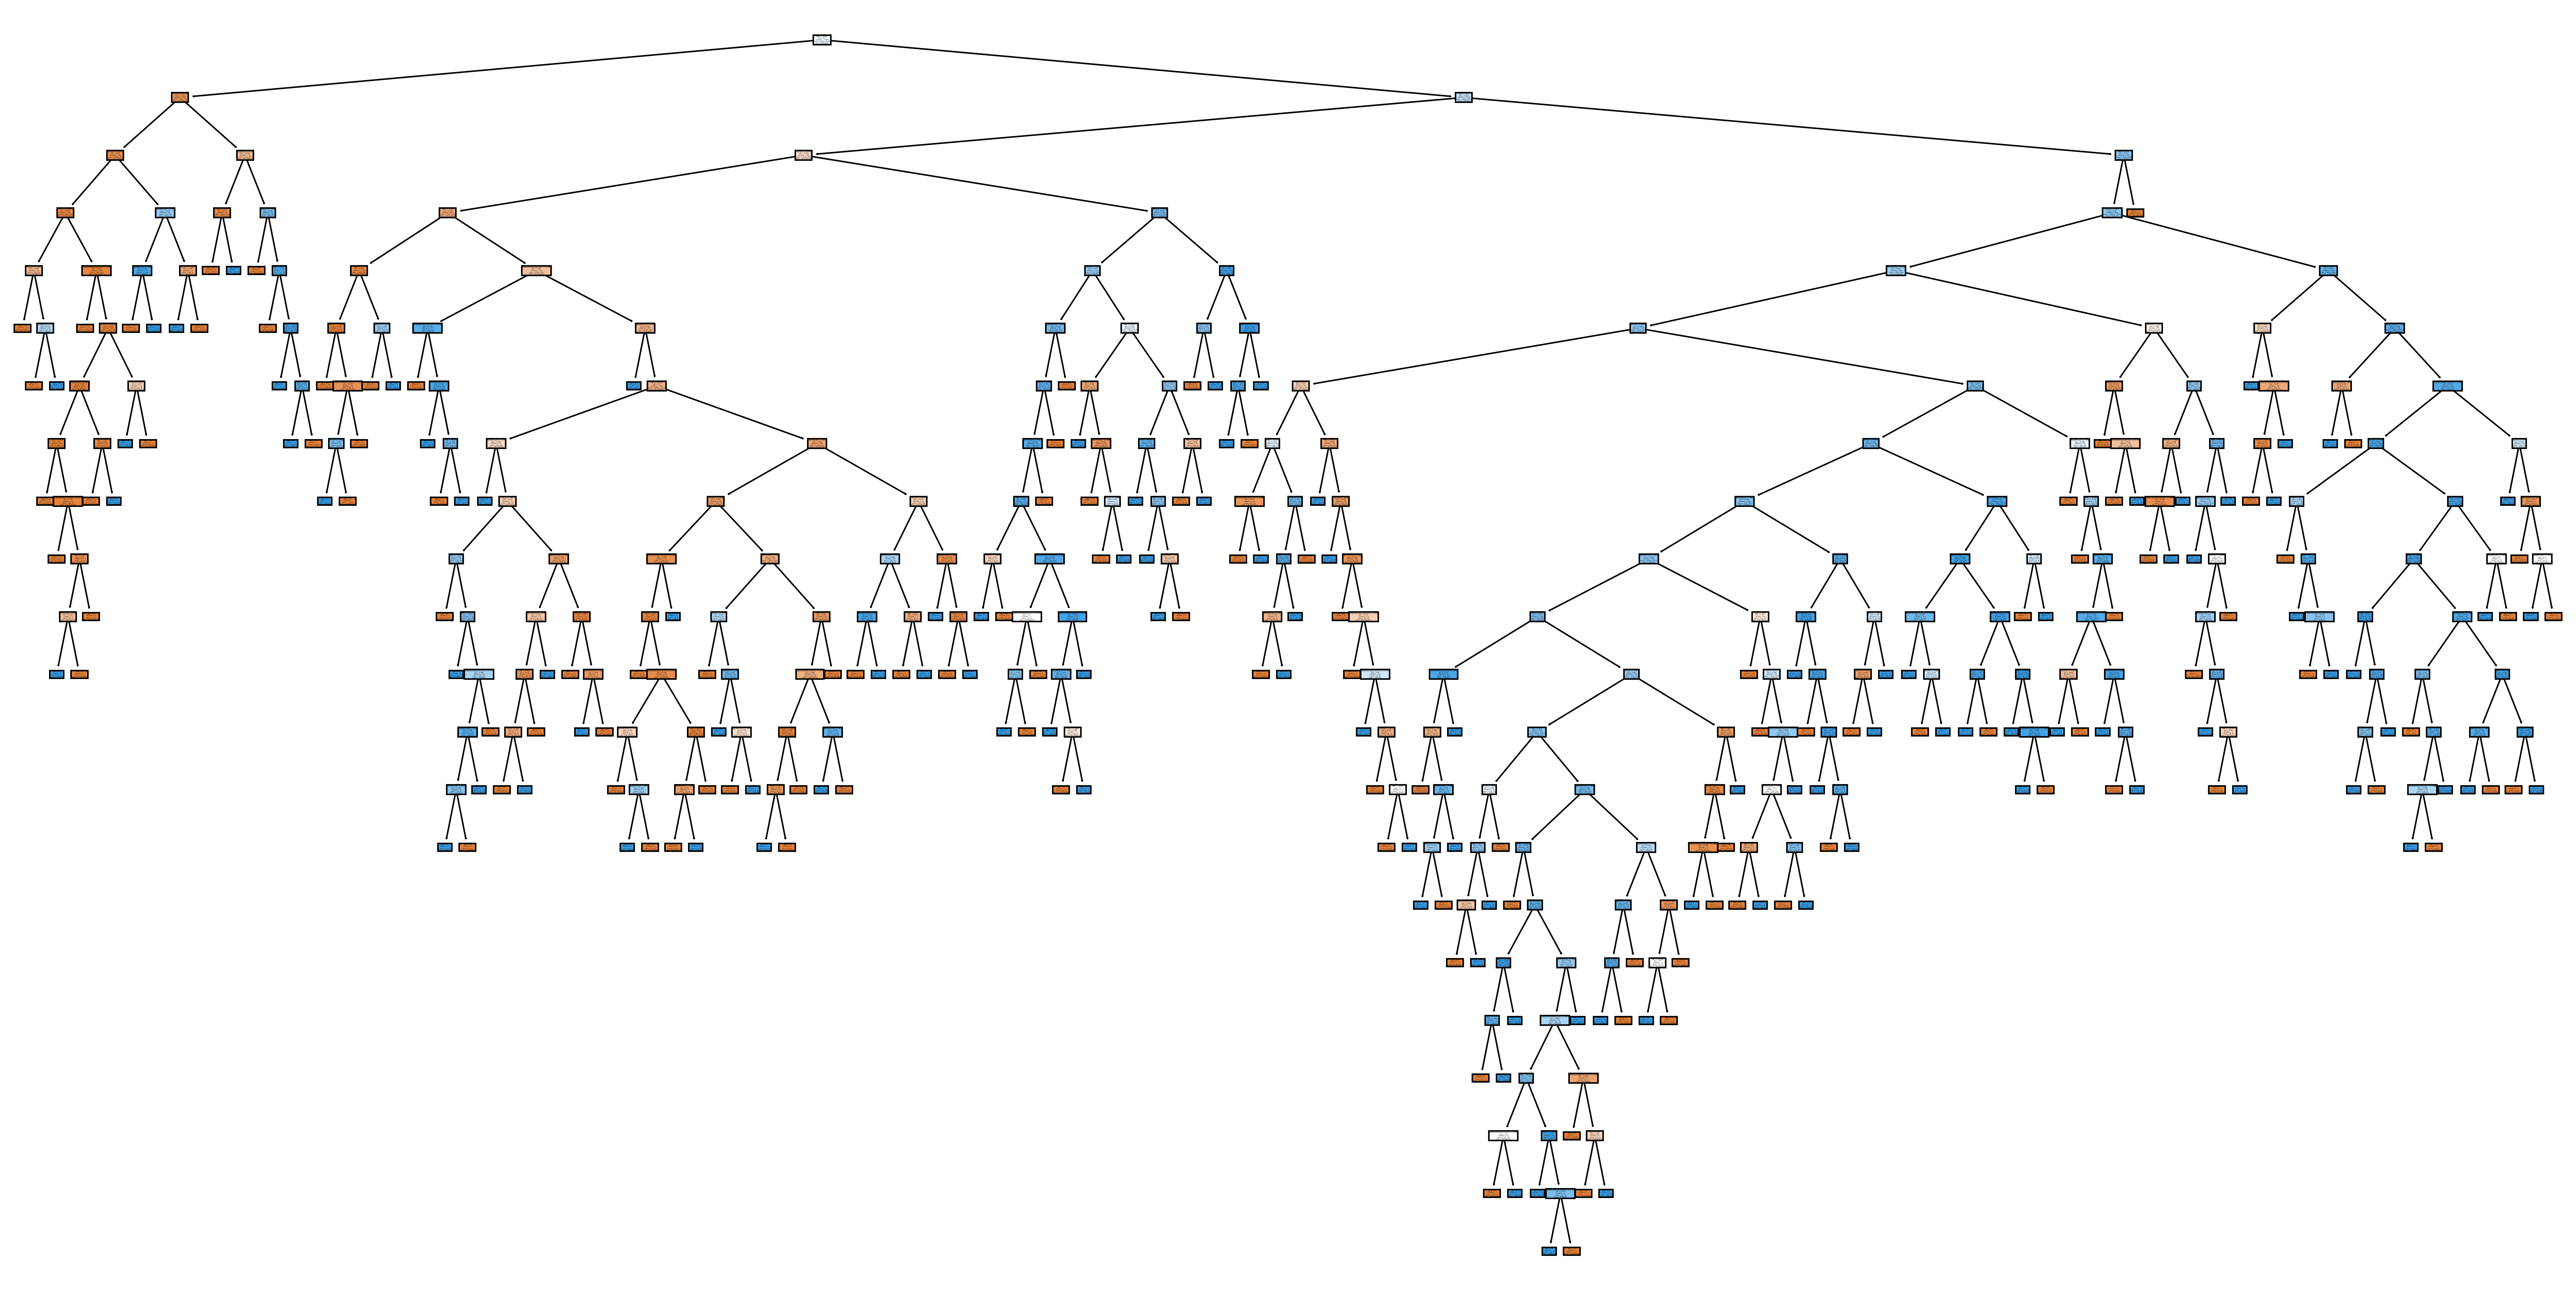

In [279]:
plt.figure(figsize=(30, 15), dpi=300)  # Ukuran lebih besar dan resolusi tinggi
plot_tree(model_rfc.estimators_[0], feature_names=x.columns, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()

# Under Sampling (Tugas)

# KNN

## 1. Training Testing ML


In [179]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

### 1.1 Buat Training KNN


In [184]:
#memuat model KNN
model_knn = KNeighborsClassifier(n_neighbors=5)

#melatih model machine Learningnya
model_knn.fit(x_train_under,y_train_under)

#Menampilkan uji peforma sisi Traning
y_pred_train_KNN = model_knn.predict(x_train_under)

#Menampilkan uji peforma sisi testing
y_pred_test_KNN = model_knn.predict(x_test)

### 1.2 Matriks Evaluasi Model KNN

In [187]:
#menampilkan akurasi sisi training
akurasi_training_knn = accuracy_score(y_train_under,y_pred_train_KNN)

#menampilkan akurasi sisi testing
akurasi_testing_knn = accuracy_score(y_test,y_pred_test_KNN)

print("Hasil Akurasinya Trainingnya adalah : ", akurasi_training_knn*100)
print("Hasil Akurasinya Testingnya adalah : ",akurasi_testing_knn*100)

Hasil Akurasinya Trainingnya adalah :  89.35611038107753
Hasil Akurasinya Testingnya adalah :  76.71480144404332


In [189]:
print("Classification report Trianing")
print(classification_report(y_train_under,y_pred_train_KNN))

Classification report Trianing
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       761
           1       0.86      0.94      0.90       761

    accuracy                           0.89      1522
   macro avg       0.90      0.89      0.89      1522
weighted avg       0.90      0.89      0.89      1522



In [191]:
print("Classification report Testing")
print(classification_report(y_test,y_pred_test_KNN))

Classification report Testing
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       363
           1       0.63      0.79      0.70       191

    accuracy                           0.77       554
   macro avg       0.75      0.77      0.76       554
weighted avg       0.79      0.77      0.77       554



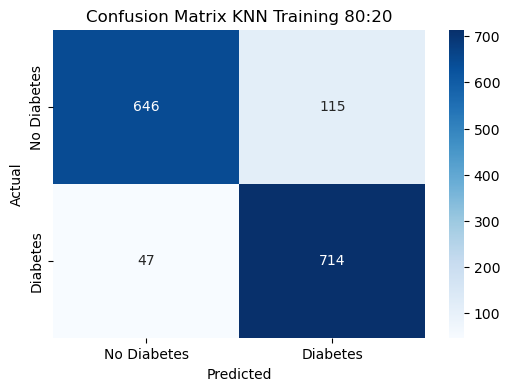

In [193]:
#confusion Matrix Training
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_train_under, y_pred_train_KNN), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix KNN Training 80:20")
plt.show()

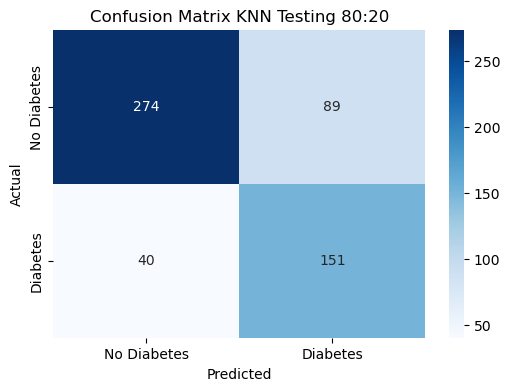

In [195]:
#confusion Matrix Testing
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_test_KNN), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix KNN Testing 80:20")
plt.show()

# NAIVE BAYES

In [200]:
from sklearn.naive_bayes import GaussianNB

## 2.1 Model Training naive bayes

In [204]:
#memuat model KNN
model_nb= GaussianNB()

#melatih model machine Learningnya
model_nb.fit(x_train_under,y_train_under)

#Menampilkan uji peforma sisi Traning
y_pred_train_NB = model_knn.predict(x_train_under)

#Menampilkan uji peforma sisi testing
y_pred_test_NB = model_nb.predict(x_test)

## 2.2 Matriks Evaluasi NB

In [209]:
#menampilkan akurasi sisi training
akurasi_training_nb = accuracy_score(y_train_under,y_pred_train_NB)

#menampilkan akurasi sisi testing
akurasi_testing_nb = accuracy_score(y_test,y_pred_test_NB)

print("Hasil Akurasinya Trainingnya adalah : ", akurasi_training_nb*100)
print("Hasil Akurasinya Testingnya adalah : ",akurasi_testing_nb*100)

Hasil Akurasinya Trainingnya adalah :  89.35611038107753
Hasil Akurasinya Testingnya adalah :  74.54873646209387


In [213]:
print("Classification report Trianing NB")
print(classification_report(y_train_under,y_pred_train_NB))

Classification report Trianing NB
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       761
           1       0.86      0.94      0.90       761

    accuracy                           0.89      1522
   macro avg       0.90      0.89      0.89      1522
weighted avg       0.90      0.89      0.89      1522



In [215]:
print("Classification report Testing NB")
print(classification_report(y_test,y_pred_test_NB))

Classification report Testing NB
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       363
           1       0.61      0.70      0.66       191

    accuracy                           0.75       554
   macro avg       0.72      0.74      0.73       554
weighted avg       0.76      0.75      0.75       554



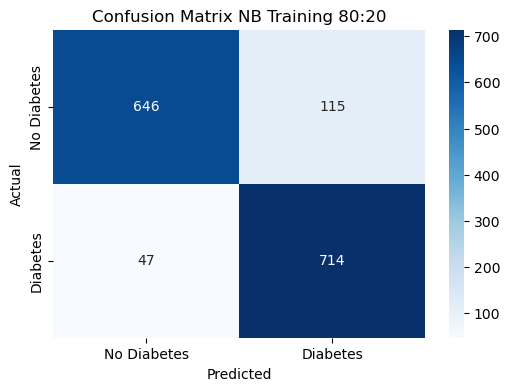

In [217]:
#confusion Matrix Training
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_train_under, y_pred_train_NB), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix NB Training 80:20")
plt.show()

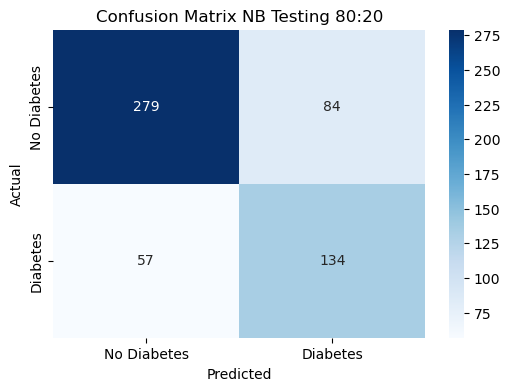

In [219]:
#confusion Matrix Training
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_test_NB), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix NB Testing 80:20")
plt.show()

# RANDOM FOREST

In [222]:
from sklearn.ensemble import RandomForestClassifier

In [226]:
#memuat
model_rfc = RandomForestClassifier(n_estimators=100,random_state=42)

#melatih
model_rfc.fit(x_train_under, y_train_under)

#menghitung traning
y_pred_train_rfc = model_rfc.predict(x_train_under)

#menghitung testing
y_pred_test_rfc = model_rfc.predict(X_test)

## Matriks Evaluasi RFC

In [230]:
#menampilkan akurasi sisi training
akurasi_training_rfc = accuracy_score(y_train_under,y_pred_train_rfc)

#menampilkan akurasi sisi testing
akurasi_testing_rfc = accuracy_score(y_test,y_pred_test_rfc)

print("Hasil Akurasinya Trainingnya RFC adalah : ", akurasi_training_rfc*100)
print("Hasil Akurasinya Testingnya RFC adalah : ",akurasi_testing_rfc*100)

Hasil Akurasinya Trainingnya RFC adalah :  100.0
Hasil Akurasinya Testingnya RFC adalah :  96.38989169675091


In [232]:
print("Classification report Trianing RFC")
print(classification_report(y_train_under,y_pred_train_rfc))

Classification report Trianing RFC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       761
           1       1.00      1.00      1.00       761

    accuracy                           1.00      1522
   macro avg       1.00      1.00      1.00      1522
weighted avg       1.00      1.00      1.00      1522



In [234]:
print("Classification report Testing RFC")
print(classification_report(y_test,y_pred_test_rfc))

Classification report Testing RFC
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       363
           1       0.91      0.99      0.95       191

    accuracy                           0.96       554
   macro avg       0.95      0.97      0.96       554
weighted avg       0.97      0.96      0.96       554



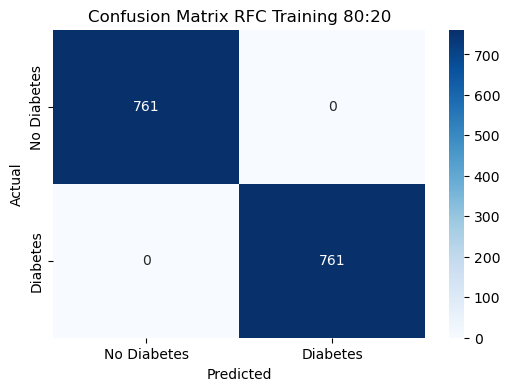

In [236]:
#confusion Matrix Training
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_train_under, y_pred_train_rfc), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix RFC Training 80:20")
plt.show()

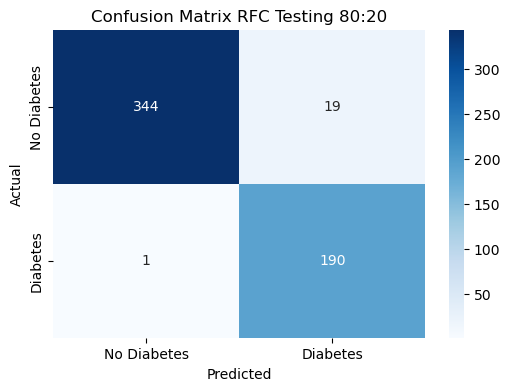

In [238]:
#confusion Matrix Testing
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_test_rfc), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix RFC Testing 80:20")
plt.show()

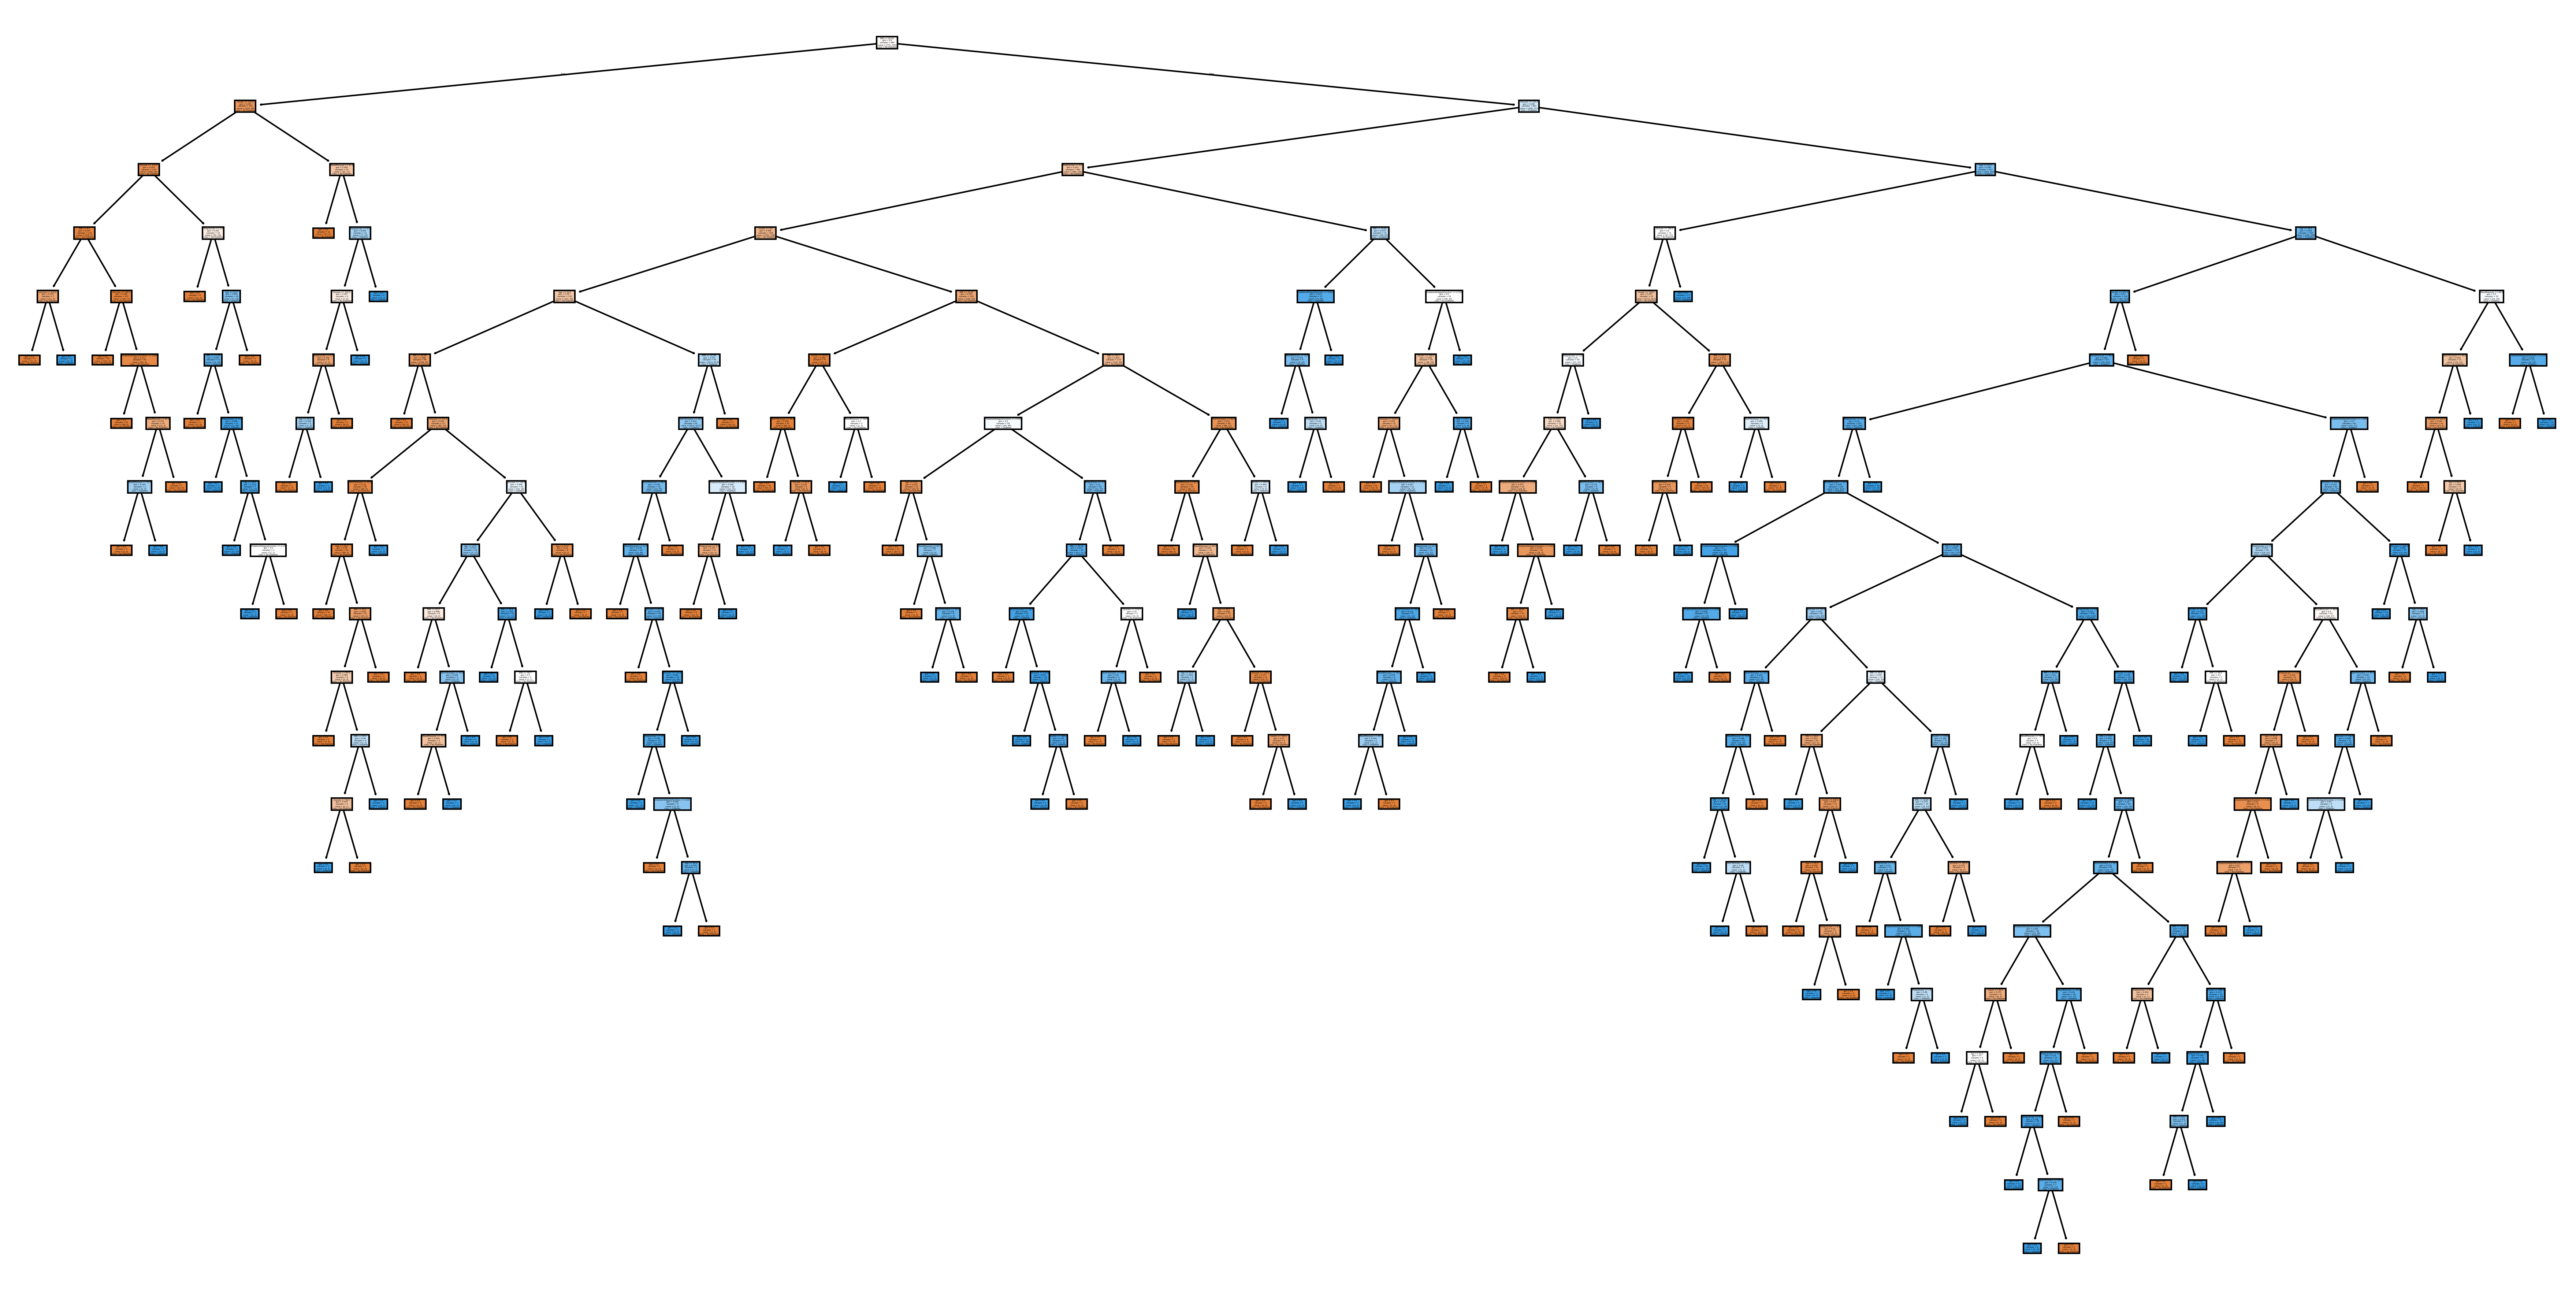

In [247]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30, 15), dpi=300)  # Ukuran lebih besar dan resolusi tinggi
plot_tree(model_rfc.estimators_[0], feature_names=x.columns, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()